### Preparing the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#downloading the dataset into csv files
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
# exploring the data types
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [4]:
# selecting the necessary columns
car_data = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
car_data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### Exploratory Data Analysis

In [5]:
# analysing the columns
for col in car_data.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [6]:
# basic statistics
car_data['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

Distribution of 'fuel_efficiency_mpg'

In [7]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

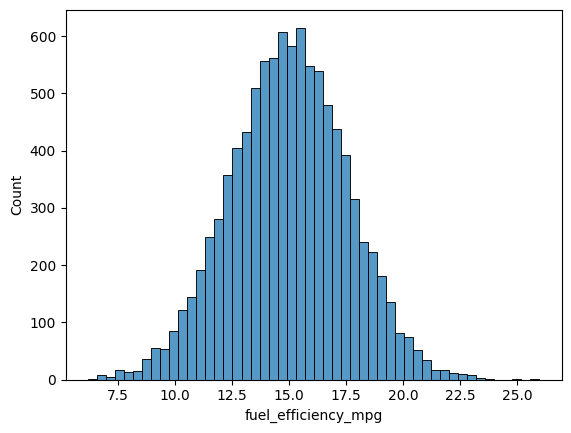

In [8]:
# plotting the histogram for fuel efficiency
sns.histplot(car_data.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

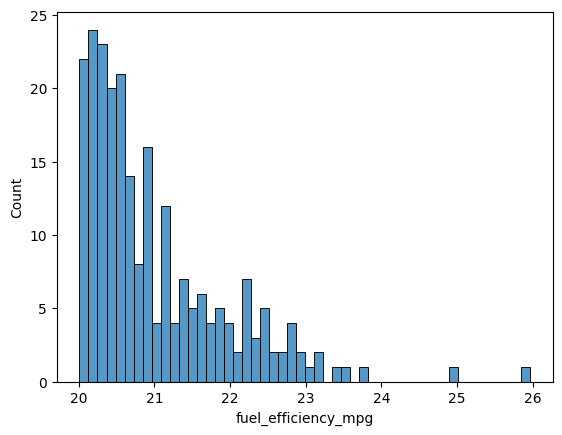

In [9]:
sns.histplot(car_data.fuel_efficiency_mpg[ (car_data.fuel_efficiency_mpg >20) & (car_data.fuel_efficiency_mpg < 50)], bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

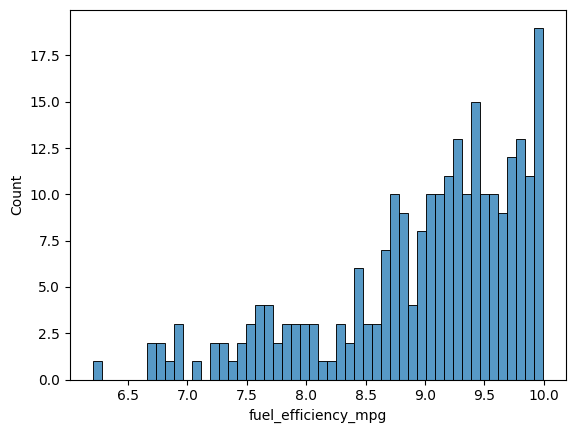

In [10]:
sns.histplot(car_data.fuel_efficiency_mpg[ (car_data.fuel_efficiency_mpg >0) & (car_data.fuel_efficiency_mpg < 10)], bins=50)

In [11]:
# calculating skewness using pandas
skew_value = car_data['fuel_efficiency_mpg'].skew()
print("Skewness:", skew_value)

Skewness: -0.012062219273507922


skewness = -0.012 is very close to 0, so there's npo significant skew. The fuel_efficiency_mpg distribution is nearly symmetric — meaning there’s no noticeable long tail in either direction.

Missing Values

Question 1
There's one column with missing values. What is it?

In [12]:
car_data.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

horsepower column has missing values

Question 2. Median for horse power

In [13]:
median_hp = car_data['horsepower'].median()
print(median_hp)

149.0


### Setting up the validation framework

In [14]:

n =len(car_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n

9704

In [16]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [17]:
car_data.iloc[[15, 0, 22, 5]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
15,220,179.0,2631.065204,2006,16.756081
0,170,159.0,3413.433759,2003,13.231729
22,190,144.0,2438.842126,2016,17.080405
5,190,NaN,2484.883986,2008,17.271818


In [18]:
df_train = car_data.iloc[:n_train]
df_val = car_data.iloc[n_train:n_train+n_val]
df_test = car_data.iloc[n_train+n_val:]

In [19]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [20]:
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
#car_data.iloc[idx[:10]]

In [22]:
df_train = car_data.iloc[idx[:n_train]]
df_val = car_data.iloc[idx[n_train:n_train+n_val]]
df_test = car_data.iloc[idx[n_train+n_val:]]

In [23]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [24]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
#df_train

In [27]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [28]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [29]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [30]:
len(y_train)

5824

### Linear Regression

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

- With 0 
- With mean 
- Both are equally good


Filling the  missing values with 0 for the column 'horsepower'.


In [31]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [33]:
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [34]:
w0

np.float64(28.82736547365895)

In [35]:
w


array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04])

RMSE 

In [36]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [37]:
rmse_value = rmse(y_train, y_pred)
print(round(rmse_value, 2))

0.52


Validating the model

In [40]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [44]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
print(round(rmse(y_val, y_pred),2))



0.52


Filling the missing values with mean for the column 'horsepower'.

In [45]:
X_train = df_train.fillna(df_train.mean()).values
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [46]:
w0

np.float64(28.925259951002698)

In [47]:
w

array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463])

RMSE

In [48]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [49]:
rmse_value = rmse(y_train, y_pred)
print(round(rmse_value, 2))

0.46


Validating the model

In [56]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [57]:
df_train.shape[0]
#df_val.shape[0]

5824

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
print(round(rmse(y_val, y_pred),2))


0.46


RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.46
- Filling missing horsepower values with the mean gives a lower RMSE,
so it performs better than filling with 0.

### Regularization

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

- Options:

 - 0
 - 0.01
 - 1
 - 10
 - 100


In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [62]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
r1 = rmse(y_val, y_pred)
print(round(r1,5))

0.51711


In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
r2 = rmse(y_val, y_pred)
print(round(r2,5))

0.51738


In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5222348802093141)

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5229812979636599)

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=100)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5230636233819933)

for r = 0.01 gives the best RMSE

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [85]:
import pandas as pd
import numpy as np

# ---------------------------------------------
# 1️⃣ Load the dataset
# ---------------------------------------------
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
# ---------------------------------------------
# 2️⃣ Define helper functions
# ---------------------------------------------
def prepare_X(df):
    df_num = df.drop(columns=['fuel_efficiency_mpg'], errors='ignore').copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
# ---------------------------------------------
# 3️⃣ Run experiment for multiple seeds
# ---------------------------------------------
rmse_scores = []

for seed in range(10):
    # Shuffle dataset with each seed
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    n_test = n - n_train - n_val

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val]
    df_test = df_shuffled.iloc[n_train + n_val:]

    # Prepare train and validation data
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    # Train and evaluate
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# ---------------------------------------------
# 4️⃣ Compute standard deviation of RMSEs
# ---------------------------------------------
std = np.std(rmse_scores)
print("RMSE scores by seed:", [round(s, 3) for s in rmse_scores])
print("Standard deviation of RMSE:", round(std, 3))

RMSE scores by seed: [np.float64(0.521), np.float64(0.522), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.529), np.float64(0.532), np.float64(0.51), np.float64(0.515), np.float64(0.513)]
Standard deviation of RMSE: 0.007


Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

In [86]:
# ---------------------------------------------
# 3️⃣ Split dataset (seed=9)
# ---------------------------------------------
seed = 9
df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

# ---------------------------------------------
# 4️⃣ Combine train + val
# ---------------------------------------------
df_full_train = pd.concat([df_train, df_val])

# ---------------------------------------------
# 5️⃣ Prepare data
# ---------------------------------------------
X_full_train = prepare_X(df_full_train)
y_full_train = df_full_train.fuel_efficiency_mpg.values

X_test = prepare_X(df_test)
y_test = df_test.fuel_efficiency_mpg.values

# ---------------------------------------------
# 6️⃣ Train model with regularization r=0.001
# ---------------------------------------------
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# ---------------------------------------------
# 7️⃣ Predict and evaluate
# ---------------------------------------------
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print("Test RMSE:", round(score, 3))

Test RMSE: 0.516
